In [15]:
import ira

%alphalab dark

%run initlibs.py Lustre dark
from tools.loaders.data_loaders import load_data, ls_symbols_hdf
from tools.charting.signals_charts import plot_entries

import qlearn as q
from qlearn.core.generators import CrossingMovings
%run trackers.py
%run generators.py
%run indicators.py

In [10]:
spreads = { 'AUS200': 15*0.1, 'SPXM': 5*0.1, 'XTIUSD': 5*0.01, }
md = load_data('amp:SPXM', 'amp:AUS200', 'amp:XTIUSD')

In [58]:
l = q.SingleInstrumentComposer(Lustre('1d', 14, 0.75, 25, 10)).fit(md.ticks())

In [59]:
tZ = q.simulation([
        [l, {
            'SPXM':   Pyramiding(10,  2, 1, 0.75, 15, flat_on_max_step=True),
            'AUS200': Pyramiding(10,  5, 1, 0.75, 15, flat_on_max_step=True),
            'XTIUSD': Pyramiding(100, 1, 1, 0.75, 15, flat_on_max_step=True)
        }],
    ], 
    md.ohlc('1h'), 'stock', 'Lustre Pyramiding', spreads=spreads)

 0: Lustre Pyramiding/0  : Sharpe: 1.33 | Sortino: 2.22 | CAGR: 52.43 | DD: $23340.30 (23.84%) | Gain: $124140.36 | Execs: 215[OK]


,Name,sharpe,sortino,cagr,dd,dd_pct,gain,number_executions
0,Lustre Pyramiding/0,1.33144,2.223324,52.427959,23340.3,23.84352,124140.36,215


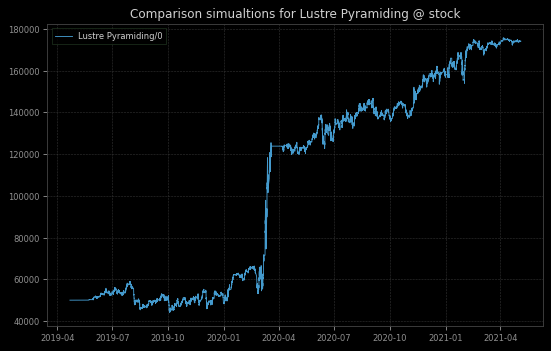

In [60]:
tZ.report(50000)


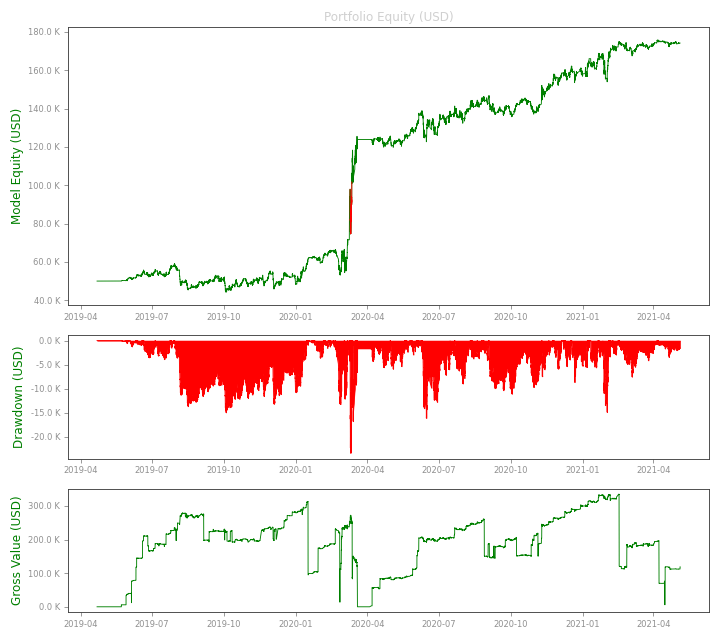

<Figure size 720x640 with 0 Axes>

In [61]:
tearsheet(tZ.results[0].get_portfolio(), 50000)

In [ ]:
# t0 = q.simulation([
#         [l, Pyramiding(10, 2, 1, 0.75, 15, flat_on_max_step=True, pyramiding_start_step=3, debug=0)], # SPXM
#     ], 
#     md['SPXM'].ohlcs('1h'), 'stock', 'Lustre Pyramiding', spreads=spreads)

# t1 = q.simulation([
#         [l, Pyramiding(10, 5, 1, 0.75, 5, flat_on_max_step=True, pyramiding_start_step=3, debug=0)], # AUS200
#     ], 
#     md['AUS200'].ohlcs('1h'), 'stock', 'Lustre Pyramiding', spreads=spreads)

# t2 = q.simulation([
#         [l, Pyramiding(100, 1, 1, 0.75, 15, flat_on_max_step=True, pyramiding_start_step=3, debug=0)], # XTI
#     ], 
#     md['XTIUSD'].ohlcs('1h'), 'stock', 'Lustre Pyramiding', spreads=spreads)